In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

### 1.	Import the Wisconsin Breast Cancer dataset from Sklearn datasets. What format is it in? Inspect the keys. What are the names of the keys? 

In [3]:
from sklearn.datasets import load_breast_cancer

breast_cancer_dataset = load_breast_cancer()
breast_cancer_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

### 2.	Create your X variable (the features) and the y variable (the labels). 

In [9]:
X = breast_cancer_dataset.data
y = breast_cancer_dataset.target
print("Shape of X ", X.shape, "Type of X", type(X))
print("First feature set data row = ", X[0])
print("Unique values of y", np.unique(y))

Shape of X  (569, 30) Type of X <class 'numpy.ndarray'>
First feature set data row =  [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
Unique values of y [0 1]


### 3.	Create a train-test split in your data using the SKLearn Train-Test split library.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print("Shape of X_train = ", X_train.shape)
print("Shape of X_test = ", X_test.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_train =  (398, 30)
Shape of X_test =  (171, 30)
Shape of y_train =  (398,)
Shape of y_test =  (171,)


### 4.	Fit the SKLearn KNeighborsClassifier with a n_neighbors value of 3. What is the accuracy score?

In [11]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model_1 = knn.fit(X_train, y_train)
# knn.predict(X_test)
print(knn_model_1.score(X_test, y_test))

0.9298245614035088


### 5.	Create predictions on the test set and use the SKLearn Classification_report library to generate a classification report. Discuss your results.

In [6]:
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        63
           1       0.92      0.96      0.94       108

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



### 6.	Visualize the dataset you have as a histogram. Normalize your data using SKLearn’s standard scaler and re-run the classifier on the data. Why do we need to normalize our data, and why does our result change? Discuss the results that you have obtained.

In [7]:
breast_cancer_df = pd.DataFrame(data = X,
                                 columns = breast_cancer_dataset.feature_names)
#breast_cancer_df

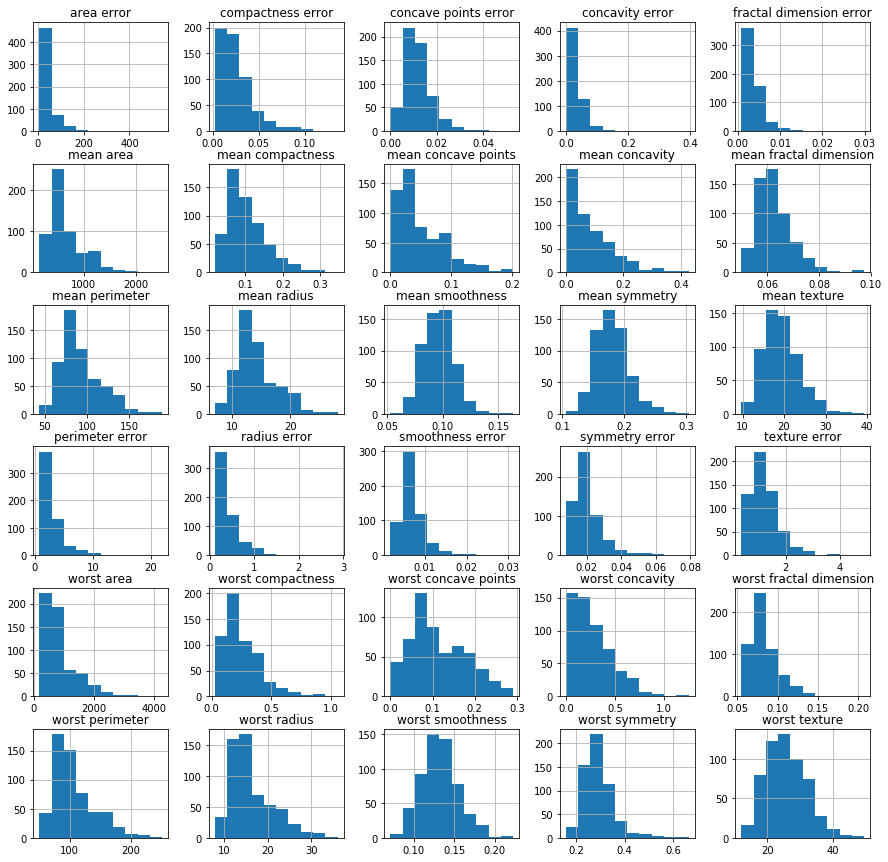

In [14]:
#Visualize dataset as histogram
pd.DataFrame.hist(breast_cancer_df, figsize=[15,15]);

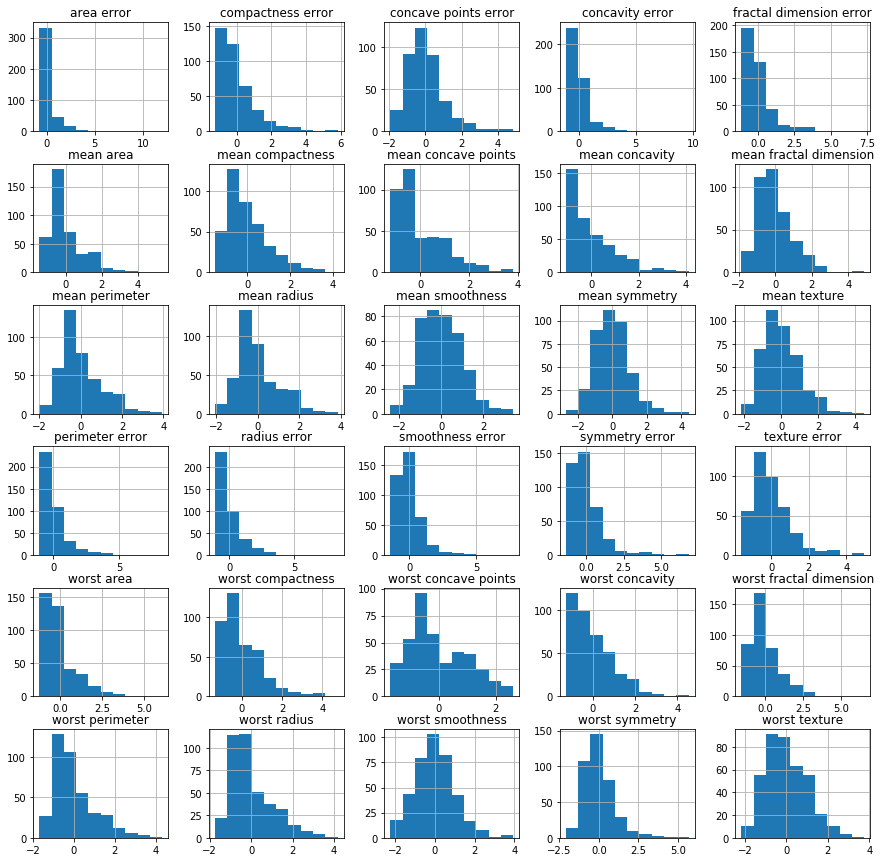

In [9]:
#Normalize your data using SKLearn's standard scaler
scaler = StandardScaler()
X_train_transform = scaler.fit_transform(X_train)
X_test_transform = scaler.transform(X_test)

breast_cancer_train_transformed_df = pd.DataFrame(data = X_train_transform,
                                                  columns = breast_cancer_dataset.feature_names)

pd.DataFrame.hist(breast_cancer_train_transformed_df, figsize=[15,15]);

In [10]:
#Re-run classifier on data
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn_model_2 = knn.fit(X_train_transform, y_train)

print(knn_model_2.score(X_test_transform, y_test))

0.9590643274853801


In [11]:
y_true, y_pred = y_test, knn_model_2.predict(X_test_transform)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



### 7.	Use an SVM to conduct the same classification. What are the differences in result?

In [12]:
svm_classifier = SVC(gamma='auto')
svm_classifier.fit(X_train_transform, y_train)

print(svm_classifier.score(X_test_transform, y_test))

0.9883040935672515


In [13]:
y_true, y_pred = y_test, svm_classifier.predict(X_test_transform)

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

